#  **Data Visualization**

## **Jenis-Jenis Visualisasi Data dan Tujuannya**

Ada banyak sekali jenis visualisasi data, dari yang sederhana hingga yang kompleks. Setiap jenis visualisasi biasanya lebih tepat digunakan untuk suatu tujuan tertentu. Secara garis besar, ada empat tujuan visualisasi yang disampaikan oleh Andrew Abela sesuai gambar berikut.

<img width=600px src=".\images\kind of data visualizations.png">

Berikut penjelasannya:

**1. Perbandingan/Komparasi**

Jika ingin membandingkan suatu sekumpulan nilai dengan nilai lainnya, ingin melihat mana yang lebih besar, mana yang lebih tinggi, mana yang naik, dsb. Untuk data yang terkait dengan waktu, visualisasi yang digunakan biasanya berupa line-chart. Sedangkan, jika yang dibandingkan adalah kategorikal, maka lebih cocok menggunakan bar-chart.

**2. Distribusi**

Bila ingin melihat distribusi/persebaran data di suatu variabel. Visualisasi yang lazim digunakan adalah histogram. Bisa melihat apakah datanya banyak terkumpul di nilai-nilai kecil, berat di kanan, atau simetris, ataupun berdistribusi normal. Untuk melihat distribusi di dua variabel, scatterplot juga bisa digunakan.

**3. Komposisi**

Digunakan untuk melihat komposisi dari suatu variabel, jika di-breakdown terhadap suatu dimensi data. Visualisasi yang biasa digunakan adalah stacked bar-chart untuk data kategorikal, atau stacked line-chart untuk data terkait waktu.

**4. Keterhubungan/Relasi**

Ketika ingin melihat keterhubungan antara suatu variabel dengan variabel lain. Misalnya ingin cek, jika variabel A semakin tinggi, apakah variabel B juga semakin tinggi, atau justru lebih rendah, atau tidak ada keterhubungannya. Visualisasi yang biasa digunakan untuk tujuan ini adalah scatter-plot.

# Overview

Berikut adalah ringkasan dari apa yang akan kita lakukan pada project kali ini:

- membuat multi line-chart yang dapat digunakan untuk melihat komparasi dari GMV dari berbagai provinsi, dari bulan ke bulan.
- menghasilkan pie chart atau multi bar-chart untuk melihat komposisi GMV per kota.
- melihat distribusi GMV atau quantity dengan gunakan histogram.
- membuat scatterplot untuk melihat relasi antara quantity dan GMV.

**Dataset**: Pada proyek kali ini, kita akan menggunakan *dummy dataset* [retail_row_reduced.csv](https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv) yang disediakan oleh DQLab yang berisi 5000 baris dan 9 kolom data customer dari sebuah perusahaan fiksi.

## **Membuat Multi-Line Chart**

Pada bagian ini, kita akan coba menggali lebih dalam tentang apa faktor yang
paling berpengaruh pada kenaikan GMV. Kita akan coba untuk menspesifikkan data
berdasarkan profinsi atau brand.

In [1]:
# Import library
import datetime
import pandas as pd
import matplotlib.pyplot as plt

Download file dengan `!wget`.




In [2]:
# cd /content/drive/MyDrive/DQLAB/Data Visualization Part 2

In [3]:
# !wget -O retail_row_reduced.csv 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'

In [4]:
# Baca dataset
dataset = pd.read_csv('retail_row_reduced.csv')
dataset.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000


In [5]:
# Cek type tiap kolom dalam dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     5000 non-null   int64 
 1   order_date   5000 non-null   object
 2   customer_id  5000 non-null   int64 
 3   city         5000 non-null   object
 4   province     5000 non-null   object
 5   product_id   5000 non-null   object
 6   brand        5000 non-null   object
 7   quantity     5000 non-null   int64 
 8   item_price   5000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 351.7+ KB


In [6]:
# Buat kolom baru yang bertipe datetime dalam format '%Y-%m'
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
# Buat Kolom GMV
dataset['gmv'] = dataset['item_price']*dataset['quantity']

In [7]:
# Group gmv berdasarkan order_month dan brand
brands = dataset.groupby(['order_month','brand'])['gmv'].sum().unstack()
brands

brand,BRAND_A,BRAND_B,BRAND_C,BRAND_H,BRAND_J,BRAND_L,BRAND_P,BRAND_R,BRAND_S,BRAND_W
order_month,,,,,,,,,,
2019-07,326713000,260605000,272511000,89936000,348151000,244413000,394808000,473672000,816882000,296350000
2019-08,357401000,293799000,380110000,160446000,645394000,402161000,618439000,427185000,744362000,423626000
2019-09,258873000,217258000,288637000,168769000,430580000,237654000,530957000,451353000,943807000,419114000
2019-10,548614000,350125000,651095000,396724000,709920000,332522000,740415000,1207866000,1102456000,680200000
2019-11,527527000,571389000,522863000,428063000,307951000,468261000,837394000,748512000,802054000,968215000
2019-12,669029000,401298000,756636000,664723000,798862000,556561000,1008256000,1358124000,1289261000,645485000


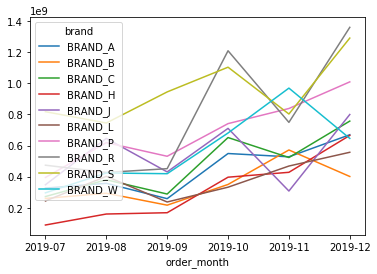

In [8]:
# Menampilkan plot
brands.plot()

Berhubung brand-nya ada banyak, dan defaultnya di tengah makanya jadi menutupi grafiknya. Solusinya adalah menggunakan method `plt.legend()` seperti yang ditunjukkan oleh potongan kode berikut ini:

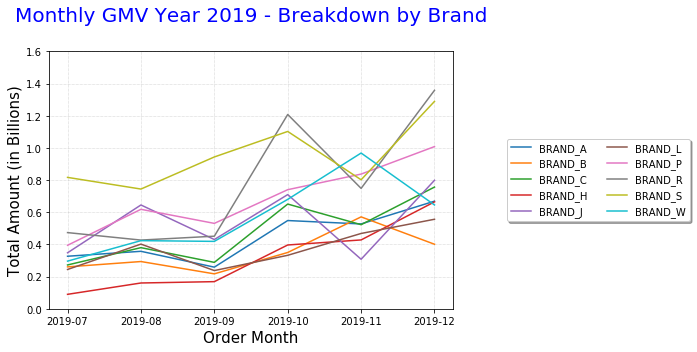

In [9]:
# Buat Multi-Line Chart dan edit legend
brands.plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(float))
plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5), shadow=True, ncol=2)
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

Jika dilihat dari grafik GMV sepanjang Oktober-Desember 2019 yang dikelompokkan berdasarkan **Brand**, semuanya terlihat mirip dan tidak ada perubahan yang signifikan. Untuk itu, kita selanjutnya akan mencoba mengelompokkan GMV berdasarkan **Provinsi**.

Tapi sebelum itu, mari lihat beberapa parameter yang bisa ditambahkan untuk legend:

- **loc**: untuk menentukan posisi legend, berikut beberapa lokasi legend yang bisa didefinisikan:
  * 'upper left', 'upper right', 'lower left', 'lower right':legend diletakkan di pojok dari axes (atas kiri, atas kanan, bawah kiri, atas kiri)
  * 'upper center', 'lower center', 'center left', 'center right': legend diletakkan di tepi axes (atas tengah, bawah tengah, tengah kiri, tengah kanan)
  * 'center': legend diletakkan di tengah-tengah axes
  * 'best': matplotlib akan memilih satu dari sekian kemungkinan lokasi legend di atas yang paling tidak overlap dengan isi grafik
- **bbox_to_anchor**: biasanya digunakan untuk adjust lokasi dari legend. Bisa berisi 2 angka yang menunjukkan koordinat x dan y (misal (1.6,0.5) berarti geser 1.6 ke kanan dan 0.5 ke atas). Bisa juga berisi 4 angka, angka ketiga dan keempat menyatakan width (lebar) dan height (tinggi) dari legend.
- **shadow**: jika diisi True, maka kotak legend akan memiliki bayangan.
- **ncol**: jumlah kolom dari isi legend, defaultnya adalah 1
- **fontsize**: ukuran huruf pada legend
- **title**: memberikan judul pada legend
- **title_fontsize**: ukuran huruf pada judul legend

## **Kustomisasi Colormap**

In [10]:
group_p = dataset.groupby(['order_month','province'])['gmv'].sum().unstack()
group_p

province,Bali,Banten,DKI Jakarta,Jawa Barat,Jawa Tengah,Jawa Timur,Yogyakarta
order_month,,,,,,,
2019-07,79480000,191513000,1951871000,476533000,252429000,282076000,290139000
2019-08,125025000,254130000,2014393000,735536000,507441000,324629000,491769000
2019-09,214442000,89088000,1469887000,886835000,607802000,268764000,410184000
2019-10,166994000,338610000,3272151000,1225234000,657536000,501911000,557501000
2019-11,170644000,153618000,2734964000,1247305000,429731000,646017000,799950000
2019-12,444627000,468673000,3459497000,1556706000,1030945000,626089000,561698000


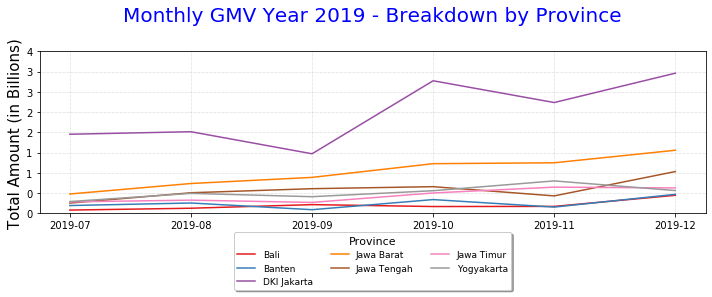

In [11]:
group_p.plot(cmap='Set1')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30, fontsize=20,color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)',fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), shadow=True, ncol=3,title='Province',fontsize=9, title_fontsize=11)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

Dari grafik diatas, terlihat ada beberapa provinsi yang mendominasi kenaikan GMV, seperti DKI Jakarta dan Jawa Barat. Sedangkan untuk provinsi sisanya, garisnya saling tumpang tindih yang artinya kenaikan GMV dimiliki tidak terlalu jauh berbeda satu dengan yang lainnya.

Selain itu, perhatikan juga bahwa pada grafik tersebut, list warnanya berbeda, tidak default seperti pada brand. Itu pada method `plot()` ditambahkan parameter `cmap` (yakni, color map) yang mendefinisikan sekelompok warna yang akan diberikan untuk tiap line. Di sini yang digunakan adalah *‘Set1’*, yakni satu set warna yang biasa digunakan untuk warna yang diskrit. Untuk mengetahui jenis-jenis color map, bisa dilihat di halaman web berikut: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html.

## **Membuat Line Chart GMV Breakdown by Top Provinces**

Terlihat cukup jelas jika kenaikan GMV disebabkan oleh provinsi. Untuk itu, kita akan fokus pada provinsi-provinsi yang GMV-nya besar saja, dan highlight untuk top 5 provinsi saja, yang lainnya kita gabungkan menjadi ‘other’.

In [12]:
# Buat variabel untuk 5 propinsi dengan GMV tertinggi
top_provinces = (dataset.groupby('province')['gmv']
                        .sum()
                        .reset_index()
                        .sort_values(by='gmv',ascending=False)
                        .head(5))
print(top_provinces)

      province          gmv
2  DKI Jakarta  14902763000
3   Jawa Barat   6128149000
4  Jawa Tengah   3485884000
6   Yogyakarta   3111241000
5   Jawa Timur   2649486000


Setelah itu, membuat kolom baru dengan nama ‘province_top’. Seperti sebelumnya, manfaatkan function apply & lambda.

In [13]:
# Buat satu kolom lagi di dataset dengan nama province_top
# dan tampilkan jumlah data point untuk masing-masing provinsi
dataset['province_top'] = dataset['province']\
                          .apply(lambda x: x if (x in top_provinces['province']\
                                                  .to_list()) else 'other')
dataset['province_top'].value_counts()

DKI Jakarta    2552
Jawa Barat      824
Jawa Tengah     457
Jawa Timur      398
Yogyakarta      393
other           376
Name: province_top, dtype: int64

Kemudian, setelah memiliki kolom baru, grafiknya bisa di update. Sebagai catatan, untuk mengubah ukuran figure, juga bisa menggunakan function `plt.gcf().set_size_inches` yang diletakkan di akhir code, sebelum `plt.show()`. 

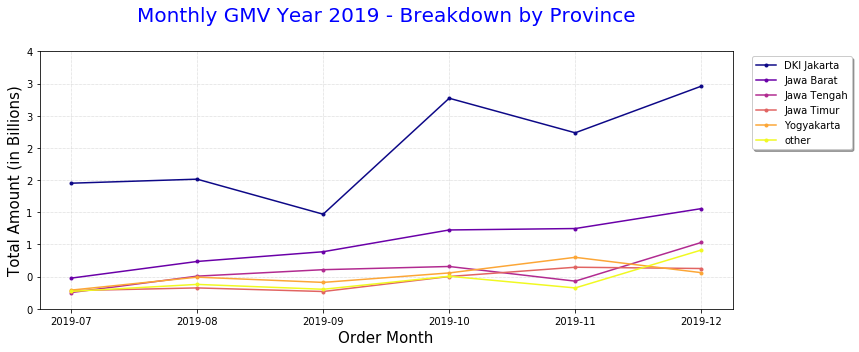

In [14]:
# Plot multi-line chartnya
dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.',cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30, fontsize=20,color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)',fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()



## **Membuat Anotasi**

Selanjutnya kita akan membuat anotasi. Anotasi mirip seperti teks, hanya saja ada suatu titik tertentu yang akan ditunjuk untuk diberikan informasi tambahan. Selain itu, kita juga bisa menambahkan panah melalui anotasi.

Untuk membuat annotate, gunakan function  plt.annotate. Parameter pertama adalah isi teksnya, dan parameter kedua adalah koordinat dari point yang dianotasi.

Selain itu ada beberapa parameter untuk anotasi yang bisa ditambahkan:
- **xytext**: Koordinat dari teks. Jika tidak diisi,maka teks akan diletakkan di koordinat point yang dianotasi (parameter kedua)
- **arrowprops**: Konfigurasi dari panah yang ditambahkan di anotasi, berupa dictionary. Beberapa hal yang bisa diset:
  * **arrowstyle**: menentukan bentuk dari panah penunjuk. Isinya bisa berupa bentuk seperti '->', '-|>', '<->', '-[', dsb. Bisa juga berupa tulisan seperti 'fancy', 'simple', 'wedge', etc.
  * **connectionstyle**: menentukan bentuk dari garis panahnya. Ada beberapa nilai yang bisa digunakan, misalnya 'arc' dan 'arc3' yang berupa garis lurus, 'angle' untuk garis berbelok siku, 'angle3' untuk garis berbelok lengkung, atau 'bar' untuk berbelok siku dua kali.
  * **color**: menentukan warna dari panah
 

Berikut adalah kode yang digunakan untuk menganotasi multi-line chart dari 5 propinsi dengan GMV tertinggi

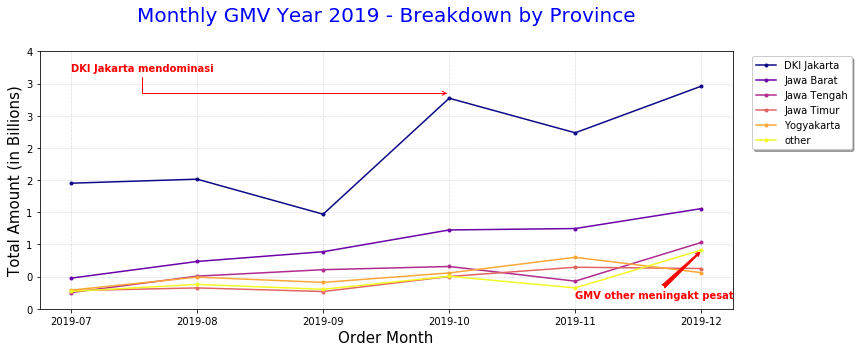

In [15]:
# Plot multi-line chartnya
dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.',cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30, fontsize=20,color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)',fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)

# Anotasi pertama
plt.annotate('GMV other meningakt pesat', xy=(5, 900000000),
             xytext=(4, 170000000), weight='bold', color='red',
             arrowprops=dict(arrowstyle='fancy',
                             connectionstyle='arc3',
                             color='red'))

# Anotasi kedua
plt.annotate('DKI Jakarta mendominasi', xy=(3, 3350000000),
             xytext=(0, 3700000000), weight='bold', color='red', 
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="angle",
                             color='red'))

plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()



Berikutnya, kita akan fokuskan untuk analisis behavior transaksi di DKI Jakarta pada bulan Oktober-Desember 2019, hal ini dilakukan karena trend dari provinsi tersebut mirip dengan overall GMV. Untuk itu, kita akan filter datanya untuk kota-kota di DKI Jakarta pada range waktu bulan Oktober-Desember 2019 saja dan menyimpannya pada sebuah data frame baru.

In [16]:
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]
print(dataset_dki_q4.head())

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   
6   1711399  2019-11-04        16791    Jakarta Barat  DKI Jakarta      P0860   

     brand  quantity  item_price order_month      gmv province_top  
0  BRAND_J        10      740000     2019-10  7400000  DKI Jakarta  
1  BRAND_R         2      604000     2019-10  1208000  DKI Jakarta  
2  BRAND_C         8     1045000     2019-11  8360000  DKI Jakarta  
4  BRAND_R         2     4475000     2019-10  8950000  DKI Jakarta  
6  BRAND_C         1     1465000     2019-11  1465000  DKI Jakarta  


## **Membuat Pie Chart**

Kita akan menampilkan persentase dari tiap kota di DKI Jakarta dalam sebuah **pie chart**. Untuk itu, sebelumnya kita perlu membuat data agregat masing-masing kota tersebut dan menyimpannya dalam sebuah variable yang kita namakan **gmv_per_city_dki_q4** yang selanjutnya datanya akan dimasukkan ke function `plt.pie()`.

Beberapa parameter yang bisa dimodifikasi:

* **labels**: array yang berisikan label/tulisan yang ditunjukkan untuk masing-masing bagian pie.
* **colors**: array yang berisikan warna untuk masing-masing bagian pie.
* **autopct**: format untuk nilai persentasi yang ditampilkan, bisa berupa string atau function.
* **shadow**: jika diisi True, maka ada bayangan untuk pie chart-nya. Defaultnya adalah False.
* **radius**: jari-jari dari pie-chart

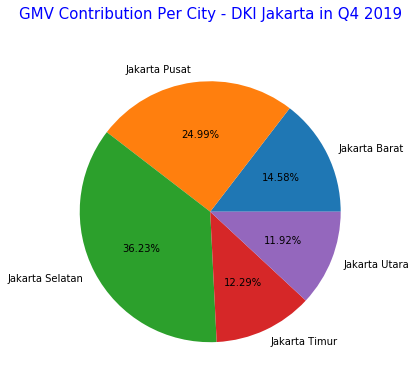

In [17]:
gmv_per_city_dki_q4 = dataset_dki_q4.groupby('city')['gmv'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gmv_per_city_dki_q4['gmv'], labels = gmv_per_city_dki_q4['city'],autopct='%1.2f%%')
plt.title('GMV Contribution Per City - DKI Jakarta in Q4 2019', loc='center',pad=30,fontsize=15, color='blue')
plt.show()

## **Membuat Bar Chart**

Selain dengan menggunakan **Pie Chart**, kita juga bisa menggunakan **Bar Chart** yang biasanya lebih disukai karena interpretabilitasnya. Berikutnya, kita akan membuat bar chart untuk membandingkan GMV untuk tiap kota.

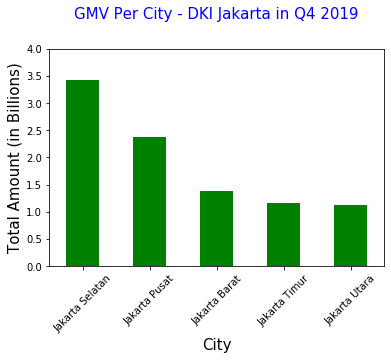

In [18]:
plt.clf()
dataset_dki_q4.groupby('city')['gmv'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('GMV Per City - DKI Jakarta in Q4 2019',loc='center',pad=30,fontsize=15, color='blue')
plt.xlabel('City',fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(float))
plt.xticks(rotation=45)
plt.show()

Dapat dilihat pada bar chart diatas, **Jakarta Selatan** dan **Jakarta Pusat** mendominasi GMV pada quarter 4 tahun 2019. Tapi apakah hal ini terjadi untuk setiap bulannya. Untuk mendapatkan jawabannya, kita akan membuat Multi-bar Chartnya.

## **Membuat Multi-Bar Chart**

In [19]:
# Membuat DataFrame untuk multi-bar chart
df_com = dataset_dki_q4.groupby(['city','order_month'])['gmv'].sum().unstack()
df_com

order_month,2019-10,2019-11,2019-12
city,,,
Jakarta Barat,375094000,429780000,575091000
Jakarta Pusat,849294000,764062000,751942000
Jakarta Selatan,1462272000,982906000,984432000
Jakarta Timur,348055000,296121000,519470000
Jakarta Utara,237436000,262095000,628562000


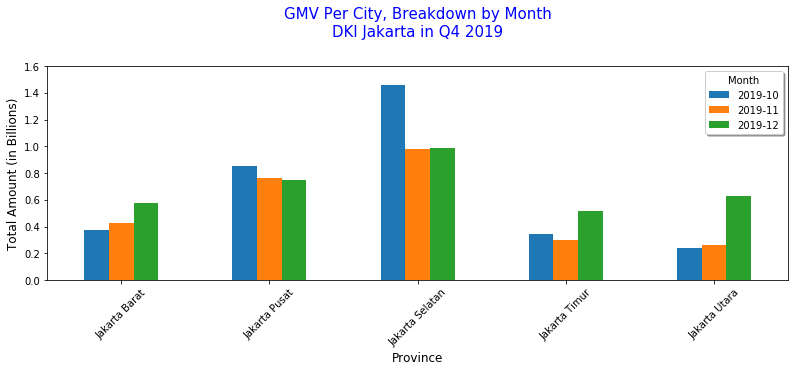

In [20]:
# Membuat Multi-bar chart
df_com.plot(kind='bar')
plt.title('GMV Per City, Breakdown by Month\nDKI Jakarta in Q4 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Province', fontsize = 12)
plt.ylabel('Total Amount (in Billions)',fontsize = 12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, title='Month')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(float))
plt.xticks(rotation=45)
plt.tight_layout()
plt.gcf().set_size_inches(12, 7)
plt.show()

Sebagai pembanding, kita akan ubah **Multi-bar Chart** sebelumnya menjadi **Stacked Bar Chart**.

In [21]:
df_omc = dataset_dki_q4.groupby(['order_month','city'])['gmv'].sum().sort_values(ascending=False).unstack()
df_omc

city,Jakarta Barat,Jakarta Pusat,Jakarta Selatan,Jakarta Timur,Jakarta Utara
order_month,,,,,
2019-10,375094000,849294000,1462272000,348055000,237436000
2019-11,429780000,764062000,982906000,296121000,262095000
2019-12,575091000,751942000,984432000,519470000,628562000


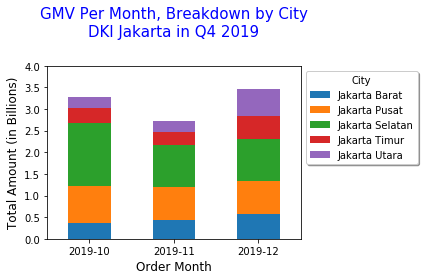

In [22]:
df_omc.plot(kind='bar', stacked=True)
plt.title('GMV Per Month, Breakdown by City\nDKI Jakarta in Q4 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Order Month', fontsize = 12)
plt.ylabel('Total Amount (in Billions)',fontsize = 12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, ncol=1,title='City')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(float))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## **Membuat Agregat Data Customer**

Data ini sudah bisa dijadikan dasar dalam membuat kampanye untuk meningkatkan transaksi. Kalau dilihat, GMV di Jakarta Barat berpotensi untuk menjadi lebih baik yang ditandai dengan growth per bulan yang selalu positif.

Berikutnya kita akan coba mencari pola-pola menarik dari customer yang ada di DKI Jakarta pada Quarter ke-4 2019. Untuk itu, kita akan membuat summary transaksi dari tiap customer.

In [23]:
data_per_customer = (dataset_dki_q4.groupby('customer_id')
                                   .agg({'order_id':'nunique', 
                                         'quantity': 'sum',
                                         'gmv':'sum'})
                                   .reset_index()
                                   .rename(columns={'order_id':'orders'}))
print(data_per_customer.sort_values(by='orders',ascending=False))

     customer_id  orders  quantity        gmv
0          12748      29       557  175286000
662        17841      26       270  144788000
207        14606      13        25   20714000
25         13089       8       166   93554000
462        16549       8        29   22714000
..           ...     ...       ...        ...
294        15154       1         4    2689000
291        15148       1        12    5400000
289        15121       1         8    2424000
288        15117       1         1    3494000
384        15975       1        42   25410000

[711 rows x 4 columns]


Di sini, dengan menggunakan function **agg** untuk melakukan agregasi data. Data agregat per customer yang diambil yaitu jumlah jenis produk yang terjual/ orders (banyaknya unique **order_id**), **total quantity**, dan **total GMV**.

Lalu didapatkan 711 customers yang bertransaksi di DKI Jakarta pada Q4 2020.

Jika diurutkan dari jumlah order terbanyak, bisa dilihat bahwa customer_id 12748 telah melakukan 29 transaksi dengan jumlah quantity mencapai 557, dan GMV lebih dari 175 Juta. Customer-customer seperti ini harus tetap dijaga agar semakin loyal dengan produk. 

## Membuat Histogram Jumlah Order

Dari DataFrame baru ini, kita dapat melihat persabaran datanya sekaligus untuk masing-masing variabel. Dengan menggunakan function `plt.hist` dan memasukkan variabel yang ingin dicek. Parameter lain yang bisa ditambahkan yaitu:
- **bins**: jumlah bin (kelompok nilai) yang diinginkan
- **range**: nilai minimum dan maksimum yang ditampilkan
- **orientation**: ‘horizontal’ atau ‘vertikal’
- **color**: warna bar di histogram

Sebelum membuat Histogram, mari tampilkan tabel jumlah order.

In [24]:
data_per_customer['orders'].value_counts().reset_index().rename(columns={"index":"Num of Orders", "orders":"Count"})

,Num of Orders,Count
0,1,504
1,2,148
2,3,41
3,4,6
4,7,4
5,8,2
6,5,2
7,29,1
8,26,1
9,13,1


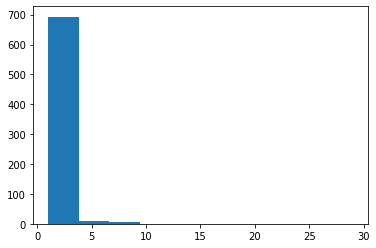

In [25]:
# Histogram pertama
plt.figure()
plt.hist(data_per_customer['orders'])
plt.show()

Terlihat bahwa datanya terlalu berat ke kiri, hampir semua customer hanya bertransaksi kurang dari 10, maka dari itu perlu set range-nya, misalnya hanya dari 1 sampai 5.

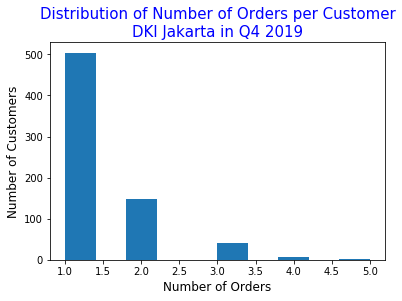

In [26]:
# Histogram kedua
plt.figure()
plt.hist(data_per_customer['orders'], range=(1,5))
plt.title('Distribution of Number of Orders per Customer\nDKI Jakarta in Q4 2019',fontsize=15, color='blue')
plt.xlabel('Number of Orders', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.show()

## Membuat Histogram Quantity

Kita juga bisa membuat histogram untuk Quantity.

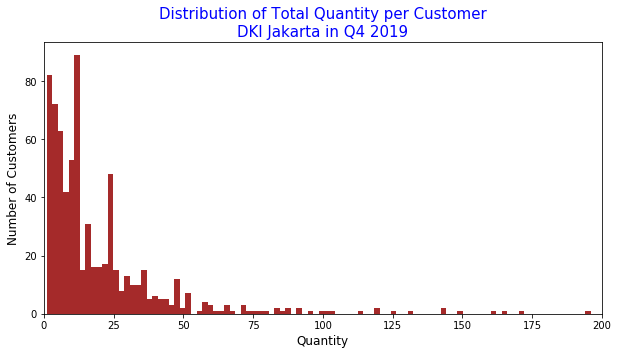

In [27]:
plt.figure(figsize=(10,5))
plt.hist(data_per_customer['quantity'], bins=100, range=(1,200), color='brown')
plt.title('Distribution of Total Quantity per Customer\nDKI Jakarta in Q4 2019',fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('Number of Customers',fontsize = 12)
plt.xlim(xmin=0,xmax=200)
plt.show()

# Membuat Histogram GMV

Selanjutnya kita akan membuat histogram untuk GMV. Tapi sebelum itu kita harus normalisasi dulu ticks label untuk sumbu-x karena jika langsung dibuat histogram, bisa jadi angka yang menunjukkan GMV terlalu banyak.

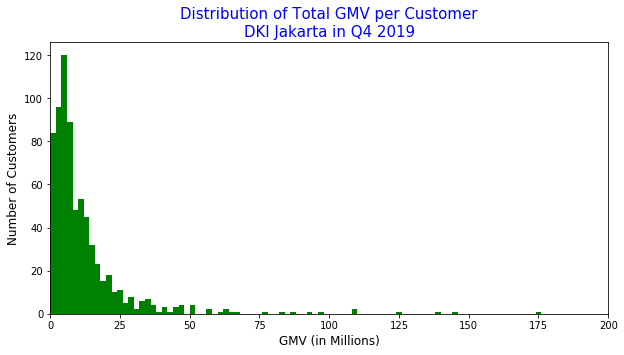

In [28]:
plt.figure(figsize=(10,5))
plt.hist(data_per_customer['gmv'], bins=100, range=(1,200000000), color='green')
plt.title('Distribution of Total GMV per Customer\nDKI Jakarta in Q4 2019',fontsize=15, color='blue')
plt.xlabel('GMV (in Millions)', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.xlim(xmin=0,xmax=200000000)
labels, locations = plt.xticks()
plt.xticks(labels, (labels/1000000).astype(int))
plt.show()

Ternyata ketiga variabel tersebut memiliki distribusi yang mirip, grafiknya condong ke kiri.

Sebelum lanjut ke langkah berikutnya, dari histogram diatas setidaknya kita bisa melihat perbedaan mendasar antar bar chart dan histogram. Bar chart punya sumbu-x dan sumbu-y, sedangkan histogram hanya punya salah satu.

# Membuat Scatterplot

Dari chart yang telah kita buat diatas, kita telah mengetahui distribusi dari beberapa variable. Pertanyaan selanjutnya adalah apakah variabel-variabel tersebut saling berkorelasi. Untuk menjawab pertanyaan tersebut, kita dapat membuat scatter plot dengan fungsi `plt.scatter()`.

Untuk melihat scatterplot quantity vs GMV:

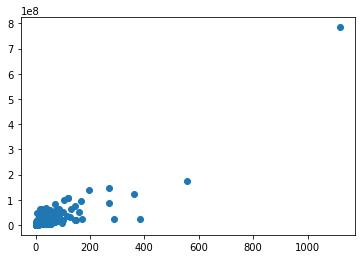

In [29]:
# Scatterplot pertama
plt.figure()
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'])
plt.show()

Terlihat bahwa memang semakin besar quantity-nya, GMV cenderung semakin tinggi. Tapi masalahnya datanya banyak terkumpul di nilai-nilai kecil, sehingga tidak begitu terlihat detailnya di area tersebut. Agar dapat lebih insigtful, kita perlu memodifikasi scatter plot-nya seperti terlihat dibawah ini.

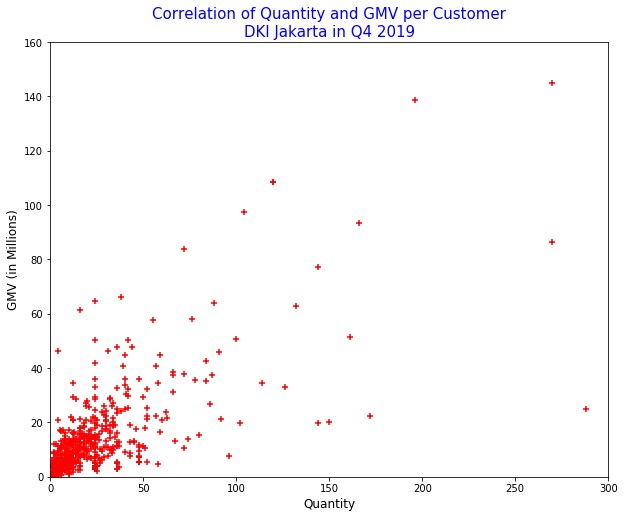

In [30]:
# Scatterplot kedua: perbaikan scatterplot pertama
plt.figure(figsize=(10,8))
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Customer\nDKI Jakarta in Q4 2019',fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)',fontsize =12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=150000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

Di sini  terlihat dengan jelas bahwa quantity dan GMV berkorelasi positif yang artinya jika seorang customer membeli product dengan  quantity yang banyak, maka kemungkinan GMV dari costumer tersebut juga semakin besar.

# Mini Project

## Case 1: Menentukan brand top 5

Berikutnya, kita akan melakukan analisis untuk top brands di bulan Desember 2019. Untuk itu, kita akan membuat variabel baru terlebih dahulu dengan nama **dataset_top5brand_dec** yang akan menyimpan data untuk 5 brand teratas dengan quantity terjual terbanyak. Kita akan bekerja dengan dataframe ini untuk visualisasi-visualisasi selanjutnya.

Mari cek kembali dataset kita.

In [31]:
dataset.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv,province_top
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000,DKI Jakarta
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000,DKI Jakarta
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000,DKI Jakarta
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08,820000,DKI Jakarta
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000,DKI Jakarta


In [32]:
# Melihat brand diurutkan berdasarkan kuantitas penjualan terbanyak
# di bulan Desember 2019

(dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False))

,brand,quantity
8,BRAND_S,2197
6,BRAND_P,2194
7,BRAND_R,1508
2,BRAND_C,1365
0,BRAND_A,1315
9,BRAND_W,1252
4,BRAND_J,1184
3,BRAND_H,1011
5,BRAND_L,852
1,BRAND_B,633


In [33]:
# mengambil informasi top 5 brands di bulan desember 2019 berdasarkan quantity
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))

In [34]:
# membuat dataframe baru, filter hanya di bulan Desember 2019 dan hanya top 5 brands
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]

# print top brands
print(top_brands)

     brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315


In [35]:
# cek dimensi dataframe dataset_top5brand_dec
print(f'dataset_top5brand_dec terdiri dari {dataset_top5brand_dec.shape[0]} baris dan {dataset_top5brand_dec.shape[1]} kolom')

dataset_top5brand_dec terdiri dari 934 baris dan 12 kolom


# Case 2: Multi-line chart daily quantity untuk brand top 

Kita akan membuat multi-line chart yang menampilkan perbandingan kuantitas penjualan dari 5 brand dengan kuantitas penjualan tertinggi pada bulan Desember 2019.

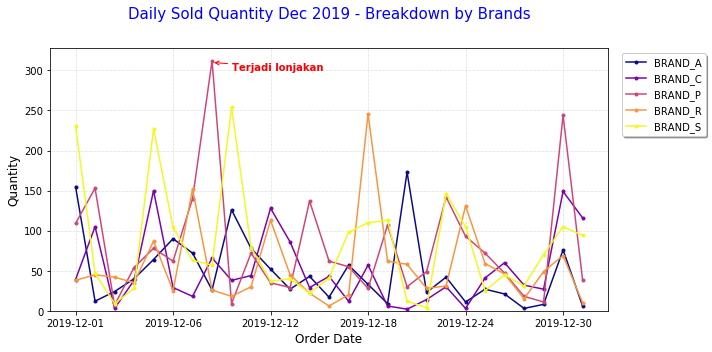

In [36]:
dataset_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Daily Sold Quantity Dec 2019 - Breakdown by Brands',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Order Date', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate('Terjadi lonjakan', xy=(7, 310), xytext=(8, 300),
             weight='bold', color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3",
                             color='red'))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

Terlihat pada tabel di atas, terjadi lonjakan pembelian sekitar 300 item pada **BRAND_P** yang merupakan pembelian terbanyak di bulan Desember 2019.

Kita juga dapat menampilkan bar chart jumlah unique product dari 5 brand yang paling laku pada bulan Desember 2019 seperti terlihat di bawah ini.

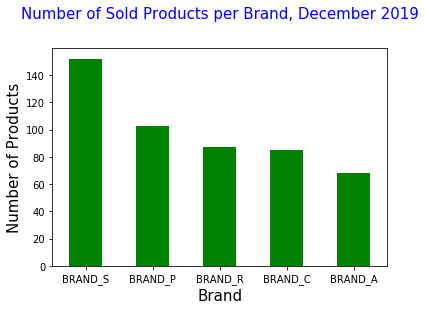

In [37]:
plt.clf()
dataset_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

# Case 4: Penjulan produk diatas 100 dan dibawah 100 selama Desember 2019

Berikutnya, kita akan mencoba untuk melihat bagaimana perbandingan unique product dari masing-masing brand yang terjual di atas 100 per unique product dan di bawah 100 per unique product.

In [38]:
import matplotlib.pyplot as plt
#membuat dataframe baru, untuk agregat jumlah quantity terjual per product
dataset_top5brand_dec_per_product = dataset_top5brand_dec.groupby(['brand','product_id'])['quantity'].sum().reset_index()
dataset_top5brand_dec_per_product

,brand,product_id,quantity
0,BRAND_A,P0002,1
1,BRAND_A,P0003,32
2,BRAND_A,P0029,12
3,BRAND_A,P0030,30
4,BRAND_A,P0033,1
...,...,...,...
490,BRAND_S,P3653,2
491,BRAND_S,P3655,12
492,BRAND_S,P3659,3
493,BRAND_S,P3665,6


In [39]:
#beri kolom baru untuk menandai product yang terjual >= 100 dan <100
dataset_top5brand_dec_per_product['quantity_group'] = dataset_top5brand_dec_per_product['quantity'].apply(lambda x: '>= 100' if x>=100 else '< 100')
dataset_top5brand_dec_per_product.sort_values('quantity',ascending=False,inplace=True)
dataset_top5brand_dec_per_product

,brand,product_id,quantity,quantity_group
58,BRAND_A,P0255,258,>= 100
465,BRAND_S,P3534,234,>= 100
238,BRAND_P,P2770,216,>= 100
245,BRAND_P,P2790,185,>= 100
186,BRAND_P,P2489,170,>= 100
...,...,...,...,...
240,BRAND_P,P2774,1,< 100
222,BRAND_P,P2677,1,< 100
221,BRAND_P,P2666,1,< 100
214,BRAND_P,P2587,1,< 100


In [40]:
#membuat referensi pengurutan brand berdasarkan banyaknya semua product
s_sort = dataset_top5brand_dec_per_product.groupby('brand')['product_id'].nunique().sort_values(ascending=False)
s_sort

brand
BRAND_S    152
BRAND_P    103
BRAND_R     87
BRAND_C     85
BRAND_A     68
Name: product_id, dtype: int64

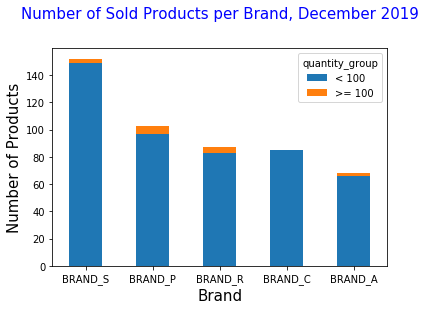

In [41]:
#plot stacked barchart
dataset_top5brand_dec_per_product.groupby(['brand','quantity_group'])['product_id'].nunique().reindex(index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True)
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

Terlihat pada chart di atas, mayoritas product dari masing-masing brand terjual dengan kuantititas di bawah 100 item.

# Case 5: Murah atau mahalkah harga produk brand top 5

Pada bagian ini kita akan membuat histogram untuk melihat distribusi harga product-product yang ada di top 5 brand di bulan Desember 2019. Untuk tiap **product_id**, ambil median harganya. Bagaimana persebaran harga product nya? Cenderung banyak yang murah atau yang mahal?

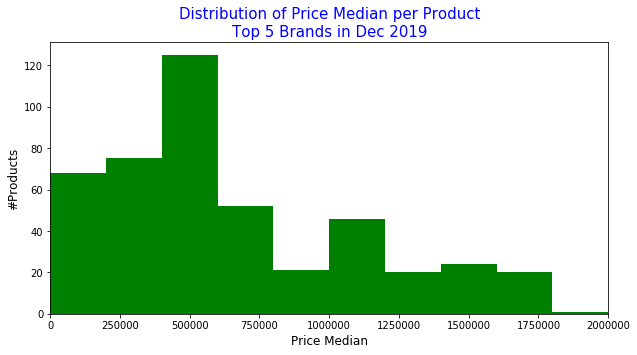

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(dataset_top5brand_dec.groupby('product_id')['item_price'].median(), bins=10, stacked=False, range=(1,2000000), color='green')
plt.title('Distribution of Price Median per Product\nTop 5 Brands in Dec 2019',fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('#Products',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.show()

In [63]:
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'median', 'gmv':'median', 'item_price':'sum'}).reset_index()
data_per_product_top5brand_dec

,product_id,quantity,gmv,item_price
0,P0002,1.0,904000,904000
1,P0003,16.0,7200000,900000
2,P0011,1.0,5945000,11890000
3,P0029,12.0,3720000,310000
4,P0030,15.0,3600000,480000
...,...,...,...,...
490,P3653,2.0,298000,149000
491,P3655,12.0,1908000,159000
492,P3659,1.0,1465000,4395000
493,P3665,6.0,14250000,2375000


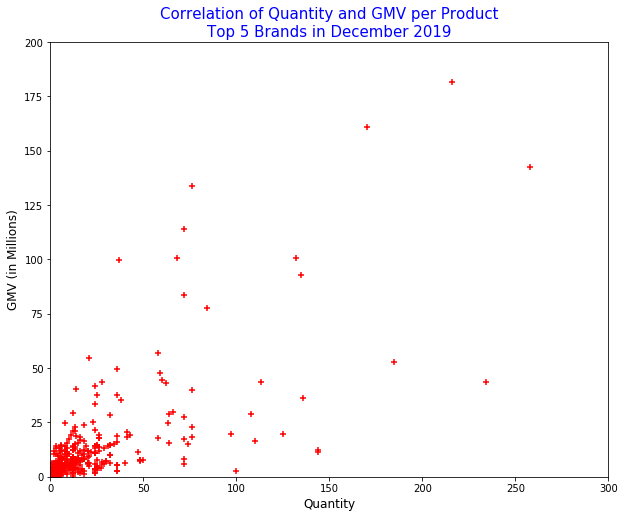

In [70]:
#agregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity':'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()

#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['quantity'],data_per_product_top5brand_dec['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)',fontsize = 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()